In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors

In [3]:
np.random.seed(0) # singleton RandomState

In [4]:
from sklearn.metrics import accuracy_score

In [5]:
# custom color map
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list(
    "", ["red", "yellow", "green"]
)

### Data (blob)

In [6]:
from sklearn.datasets import make_blobs

# generate blob data
data, labels = make_blobs(n_samples=1000, # number of datapoints
                          centers=4, # number of blobs - one blob has one label -> number of classes.
                          n_features=2, # number of inputs
                          random_state=0 # same random_state -> generate same data - for repeatability
                         )


# get 2 classes out of these 4 classes(combining 2 each)
labels_orig = labels
# new label:
labels = np.mod(labels_orig, 2)  # remainder dividing by 2
# 0,2 -> 0
# 1,3 -> 1


from sklearn.model_selection import train_test_split

XX_train, XX_val, Y_train, Y_val = train_test_split(
    data, labels, stratify=labels, random_state=0
)

## FF net (simple)

* 3 neuron n/w - one hidden layer with 2 neurons; output layer with 1.
* 2 input, one output

naming : 
preactivation -> a (aggregation)  
post activation -> h (hidden out)

implemented like a single model abstraction..

<img src="model_pictures/simple_ff_net.png" width="20%" height="20%" />

to have a class variable.. just do self.var (it doesn't have to be initialised in init. initialise if you want. then that value will be assigned while making object) its good practice to initialise everything in init - because the functions will be using the attributes and we don't want one of those to try to access it before initialisation.

input, all weights, all biases.. preactivation, activation.. are all in the picture.. - part of the abstraction.

calling grad - computes the gradient(with that input) and the values are now in self.dwi    
update with average of gradient over all input.   
cummulate them into variable dwi, iterating through each datapoint - as we need average.   
dividing by m -> average.   

updating the parameters only after coming out of all the datapoints.  
one epoch - total gradient - one update.  

In [7]:
from simple_ff_net import SimpleFFNet

In [8]:
sfn = SimpleFFNet()

  0%|          | 0/2000 [00:00<?, ?epoch/s]

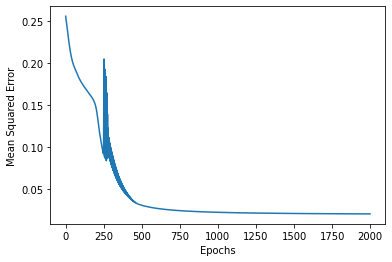

In [9]:
sfn.fit(XX_train, Y_train, epochs=2000, learning_rate=0.01, display_loss=True)

going below the error-order than before.

In [10]:
# evaluation

Y_pred_train = sfn.predict(XX_train)
Y_pred_binarised_train = (Y_pred_train >= 0.5).astype("int").ravel() #class output

Y_pred_val = sfn.predict(XX_val)
Y_pred_binarised_val = (Y_pred_val >= 0.5).astype("int").ravel() #class output

accuracy_train = accuracy_score(Y_pred_binarised_train, Y_train)
accuracy_val = accuracy_score(Y_pred_binarised_val, Y_val)

print("Training accuracy", round(accuracy_train, 2))
print("Validation accuracy", round(accuracy_val, 2))

Training accuracy 0.98
Validation accuracy 0.94


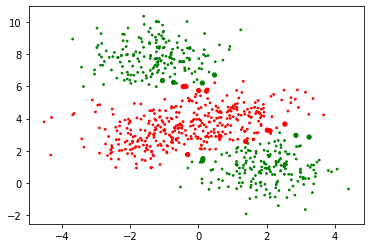

In [11]:
plt.scatter(XX_train[:,0], XX_train[:,1], 
            c=Y_pred_binarised_train, cmap=my_cmap, 
            s=15*(np.abs(Y_pred_binarised_train-Y_train)+.2))
plt.show()

2 lines now. **two neurons in hidden layer-two lines**  
only problem with the overlapping kind(overlapping interface) of data points.   
can't expect high performance at interface.